# **Final Project Virtual Internship Experience ID/X Partners**  
# Data Scientist

# "Analisis Nilai Prediksi Pada Risiko Pinjaman Kredit"

Oleh : Muhamad Aditya Darmawan  


### Deskripsi Projek

Pada projek analisis nilai prediksi risiko kredit, tujuan bisnisnya melibatkan proses identifikasi alternatif solusi untuk mengurangi risiko kredit yang gagal bayar, meningkatkan proses pengambilan keputusan terkait kredit, dan meminimalkan kerugian bagi perusahaan. Masalah yang didefinisikan adalah bagaimana cara untuk mengantisipasi risiko kredit dari pelanggan yang mengajukan pinjaman. Untuk memahami kebutuhan dan sudut pandang para pemangku kepentingan, penting untuk berkomunikasi dengan tim manajemen, tim risiko, dan tim keuangan perusahaan. Kriteria keberhasilan dalam hal ini dapat diukur dengan peningkatan akurasi dalam memprediksi risiko kredit serta pengurangan jumlah kredit yang gagal dibayar.

### Tujuan

Menemukan suatu model yang mampu memprediksi apakah pengguna mampu membayar kredit atau tidak.

### Pemodelan

Data yang tersedia memiliki label, sehingga dirasa efektif menggunakan Supervised Learning. Projek ini akan mengimplementasikan pemodelan klasifikasi untuk memprediksi label dan inputan. Pada proses klasifikasi, model dilatih dengan train yang kemudian data test nya akan dilakukan evaluasi prediksi. 

### Sumber Data

Data yang didapatkan adalah catatan Data Lending Club dari tahun 2007 sampai dengan 2014 yang bersumber dari [Kaggle](https://www.kaggle.com/datasets/devanshi23/loan-data-2007-2014/data). 

### **A. Import Libraries dan Load Dataset**

In [1]:
# Import libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

# from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# from google.colab import drive

from sklearn.preprocessing import StandardScaler

### **B. Cek Library Version**

In [2]:
print('Pandas Version     :',pd.__version__)
print('Numpy Version      :',np.__version__)
print('Matplotlib Version :',matplotlib.__version__)
print('Seaborn Version    :',sns.__version__)
print('Sklearn Version    :',sklearn.__version__)

Pandas Version     : 2.2.1
Numpy Version      : 1.26.4
Matplotlib Version : 3.8.4
Seaborn Version    : 0.12.2
Sklearn Version    : 1.4.2


### **C.  Load Dataset**

In [3]:
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\darma\AppData\Local\Temp\ipykernel_1232\1028708547.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


### **D. Data Understanding**

In [4]:
# Menampilkan 5 baris  data teratas

df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
# Melihat Deskripsi Dataframe

df.describe() 

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [7]:
# Missing value
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isnull().sum(), round((df[col].isnull().sum()/len(df[col]))*100, 2), df[col].nunique(), list(df[col].drop_duplicates().sample(5,replace=True).values)]);

df_desc = pd.DataFrame(columns=['Column', 'Dtype', 'null count', 'null perc.', 'unique count', 'unique sample'],
                     data=listItem)
df_desc

,Column,Dtype,null count,null perc.,unique count,unique sample
0,Unnamed: 0,int64,0,0.00,466285,"[72035, 154929, 253612, 222922, 137334]"
1,id,int64,0,0.00,466285,"[1864928, 366989, 14600743, 9002004, 16402793]"
2,member_id,int64,0,0.00,466285,"[6907560, 9412093, 28370380, 14298555, 1846537]"
3,loan_amnt,int64,0,0.00,1352,"[32800, 28475, 26875, 6350, 4425]"
4,funded_amnt,int64,0,0.00,1354,"[9600, 9200, 22475, 23400, 1850]"
...,...,...,...,...,...,...
70,all_util,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"
71,total_rev_hi_lim,float64,70276,15.07,14612,"[73410.0, 44812.0, 21939.0, 61299.0, 11280.0]"
72,inq_fi,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"
73,total_cu_tl,float64,466285,100.00,0,"[nan, nan, nan, nan, nan]"


### **E. Missing Value Handling**

In [8]:
# Copy Dataframe

df_copy = df.copy()

In [9]:
# Melihat kuantitas missing value
df_copy.shape

(466285, 75)

In [10]:
# Drop column with missing values more than 70%
threshold = len(df_copy) * 0.7
df_clean = df_copy.dropna(axis=1, thresh=threshold)

In [11]:
# Menampilkan data setelah dibersihkan
df_clean.shape

(466285, 53)

### **F. Menentukan Kolom Target**

In [12]:
# Check Value Untuk Status Loan 
df_clean.loan_status.value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [13]:
# Mendefinisikan kategori loan menjadi Excellent loans dan bad loans
excellent_loan_statuses = ['Current', 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
bad_loan_statuses = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# Membuat kolom 'loan_category' Untuk klasifikasi loan sebagai 'Excellent' or 'Bad'
df['loan_category'] = df['loan_status'].apply(lambda x: 'Excellent' if x in excellent_loan_statuses else 'Bad')
df_clean = pd.concat([df_clean, df['loan_category']], axis=1)

# Menghitung jumlah loan setiap kategori
loan_category_counts = df['loan_category'].value_counts()

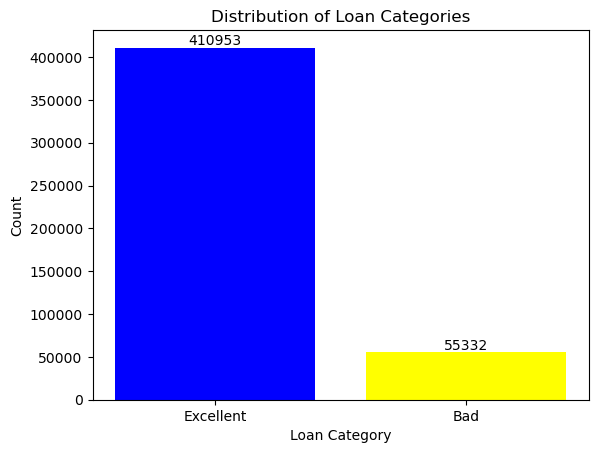

In [14]:
# Menentukan warna pembeda dari kategori loan 
colors = ['blue', 'yellow']

# Memodelkan grafik distribusi persebaran loan
plt.bar(loan_category_counts.index, loan_category_counts.values, color=colors)
plt.xlabel('Loan Category')
plt.ylabel('Count')
plt.title('Distribution of Loan Categories')

# Add values on top of the bars
for i, count in enumerate(loan_category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

## **G. Drop Column** 

In [15]:
# Cek kolom yang tesedia
df_clean.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'loan_category'],
      dtype='object')

In [16]:
for column in df_clean.columns:
    value_counts = df_clean[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for Unnamed: 0:
Unnamed: 0
0         1
310839    1
310865    1
310864    1
310863    1
         ..
155424    1
155423    1
155422    1
155421    1
466284    1
Name: count, Length: 466285, dtype: int64

Value counts for id:
id
1077501     1
26180404    1
26219322    1
26239577    1
26290537    1
           ..
3714715     1
3703738     1
3731030     1
3705772     1
9199665     1
Name: count, Length: 466285, dtype: int64

Value counts for member_id:
member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64

Value counts for loan_amnt:
loan_amnt
10000    33023
12000    25519
15000    23486
20000    22759
35000    16596
         ...  
34250        1
33400        1
32150        1
34325        1
33175        1
Name: count, Length: 1352, dtype: int64

Value counts for funded_amnt:
funded_amnt
10000    32930
12000    25426
15000    2337

In [17]:
# Menghapus kolom yang tidak dibutuhkan
unused_col = ['policy_code', 'application_type', 'Unnamed: 0', 'id', 'member_id','issue_d', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                   'last_pymnt_d', 'last_pymnt_amnt', 'zip_code', 'title', 'emp_title','loan_status']

drop_data = df_clean[unused_col]

df_clean.drop(columns=unused_col, axis=1, inplace=True)

In [18]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_category
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,83.7,9.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,9.4,4.0,f,Sep-13,0.0,0.0,NaN,NaN,NaN,Bad
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,98.5,10.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,21.0,37.0,f,Jan-15,0.0,0.0,NaN,NaN,NaN,Excellent
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,53.9,38.0,f,Jan-16,0.0,0.0,NaN,NaN,NaN,Excellent


### **H. Missing Values Imputation**

In [19]:
# Menampilkan jumlah missing value
df_clean.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                    21008
home_ownership                    0
annual_inc                        4
verification_status               0
url                               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
last_credit_pull_d               42
collections_12_mths_ex_med      145
acc_now_delinq              

In [20]:
# List of columns for imputation
categorical_columns = ['emp_length', 'verification_status', 'earliest_cr_line', 'last_credit_pull_d']
numerical_columns = ['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
                    'collections_12_mths_ex_med', 'acc_now_delinq']

# Impute categorical columns with mode
for col in categorical_columns:
    mode_value = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_value, inplace=True)

# Impute numerical columns with median
for col in numerical_columns:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)

C:\Users\darma\AppData\Local\Temp\ipykernel_1232\2330630658.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(mode_value, inplace=True)
C:\Users\darma\AppData\Local\Temp\ipykernel_1232\2330630658.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [21]:
df_clean.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
url                               0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
initial_list_status               0
last_credit_pull_d                0
collections_12_mths_ex_med        0
acc_now_delinq              

In [23]:
# Cek Duplikasi 
df_clean.duplicated().any()

False

Tidak ada data yang terduplikasi

### **I. Cek Nilai Korelasi.** 